In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
def show_cls(df):
  x=df.columns[0]
  y=df.columns[1]
  dict1 = {-1 : 'black',0 : 'red',1 : 'green',2 : 'blue'}
  sns.scatterplot(x='x',y='y',data=df,hue='color',palette=dict1)


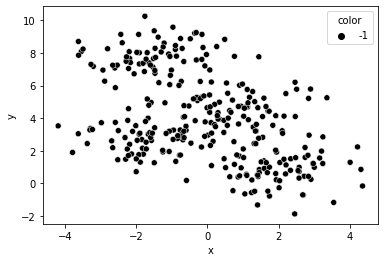

In [ ]:
#입력 데이터 생성
x,y = make_blobs(300,centers=4, n_features=2,random_state=0)

df=pd.DataFrame(data=x,columns=['x','y'])
df['color']=-1

show_cls(df)

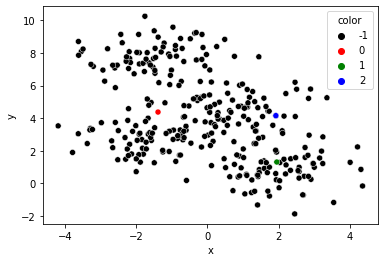

In [ ]:
# k 중심점 생성
k_center,co= make_blobs(3,centers=3,n_features=2,random_state=0)
centers=pd.DataFrame(data=k_center,columns=['x','y'])

centers['color'] = [0,1,2]

show_cls(pd.concat([df,centers]))

In [ ]:
def distance(a,b):
  x=a.x - b.x
  y=a.y - b.y
  return (x**2 + y**2)**(1/2)

def nearest(a,centers):
  A=[distance(a,centers.loc[i]) for i in range(0,3)]
  cls=A.index(min(A))
  return cls


300


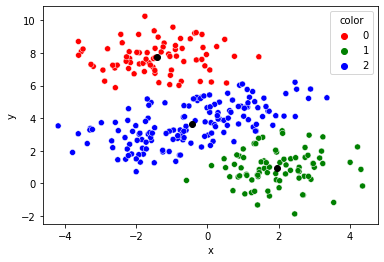

In [ ]:
while(True):
  # 모든 점과의 거리를 계산하여 거리 계산 후 가까운 거로 묶음.
  updated_color=[nearest(df.loc[i],centers) for i in range(0,300)]
  
  #얼마나 바뀔건지 확인
  score = 0
  for i in range(0,300):
    if updated_color[i] == df.loc[i]['color']:
      score +=1
  
  
  #색 변경
  df['color']=updated_color
  
  #중심점 기반으로 다시 그림 그림
  print(score)
  show_cls(df)
  plt.scatter(centers['x'],centers['y'],c='black')
  plt.show()
  if score >299:
    break

  # 각 색끼리 중심점 구함
  new_centers=df.groupby('color')['x','y'].mean()
  new_centers=new_centers.reset_index()
  centers=new_centers

  
  

In [ ]:
df.groupby('color')['x','y'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,x,y
color,,
0,-0.640320,5.105069
1,2.000714,0.719444
2,-1.516240,1.269453
